In [1]:
# Libaries and Tools

import glob
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os

In [2]:
# Key Varibles

resultsFolder = 'Results/'
saveName = '.Area.npz'

In [3]:
# Key Functions
def rollingAvg(dates,values,window):
    
    # Cut window in half
    halfWindow = window/2
    
    avgValues = np.empty(len(values)); avgValues[:] = np.nan
    stdValues = np.empty(len(values)); stdValues[:] = np.nan
    
    # Cycle Through Data
    for i in range(len(dates)):
        
        # Window
        minDate = np.max([dates[i] - halfWindow, dates[0]])
        maxDate = np.min([dates[i] + halfWindow, dates[-1]])
        
        # avg
        avgValues[i] = np.mean(values[(dates>minDate)&(dates<maxDate)])
        
        # std
        stdValues[i] = np.std(values[(dates>minDate)&(dates<maxDate)])
        
    return avgValues,stdValues

In [4]:
# Get Data
dataset = sorted(glob.glob(resultsFolder + '*' + saveName))

In [5]:
# Stack data

# Open First .npz file and get list of "arrays"
data = np.load(dataset[0], allow_pickle=True)
lst = data.files
    
# Get Data
dates   = data[lst[0]]
pxAreas = data[lst[1]]
MmAreas = data[lst[2]]

# remaining cases
for i in range(1,len(dataset)):
    
    # Open .npz file and get list of "arrays"
    data = np.load(dataset[i], allow_pickle=True)
    lst = data.files
    
    # Get Data
    newDates   = data[lst[0]]
    newPxAreas = data[lst[1]]
    newMmAreas = data[lst[2]]
    
    # Combine Data, Preveting Doubles
    if dates[-1] == newDates[0]:
        dates   = np.hstack([dates,newDates[1:]])
        pxAreas = np.hstack([pxAreas,newPxAreas[1:]])
        MmAreas = np.hstack([MmAreas,newMmAreas[1:]])
    else:
        dates   = np.hstack([dates,newDates])
        pxAreas = np.hstack([pxAreas,newPxAreas])
        MmAreas = np.hstack([MmAreas,newMmAreas])

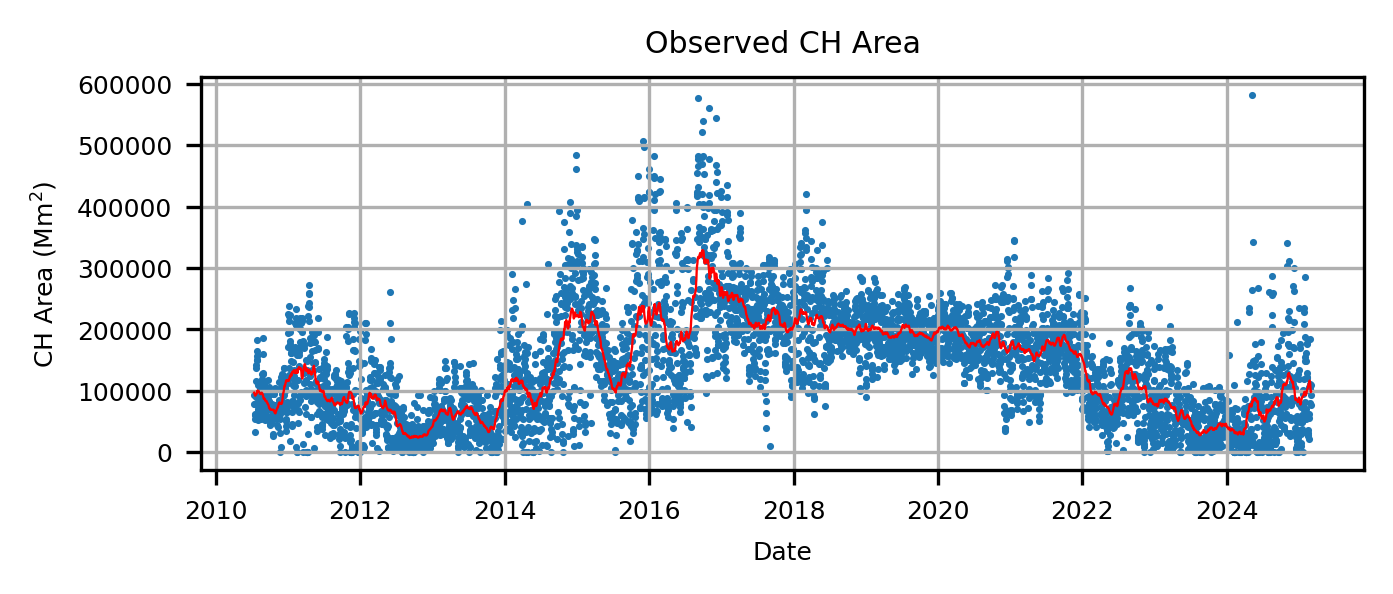

In [6]:
# Rolling Avg
window = datetime.timedelta(days=60)
label=str(window)[:-10]+' sliding window mean'
MmAvg,MmStd = rollingAvg(dates,MmAreas,window)

# Plot Results
plt.figure(figsize=[5,1.7],dpi=300)
plt.rcParams.update({'font.size': 6})
plt.scatter(dates,MmAreas,.5,label='Observed Area')
plt.plot(dates,MmAvg,'r',lw=.55,label=label)
#plt.fill_between(dates,MmAvg-MmStd,MmAvg+MmStd,color=(1,0,0,.3),label='Standard Deviation')
#plt.legend()
plt.title('Observed CH Area')
plt.xlabel('Date')
plt.ylabel(r'CH Area (Mm$^2$)')
plt.grid()
title = 'CHareaMm' + label.replace(' ','') + '.eps'
saveFolder = '../../Figures/DailyCadence/'
if not os.path.exists(saveFolder):
    os.makedirs(saveFolder)
plt.savefig(saveFolder+title)
plt.show()

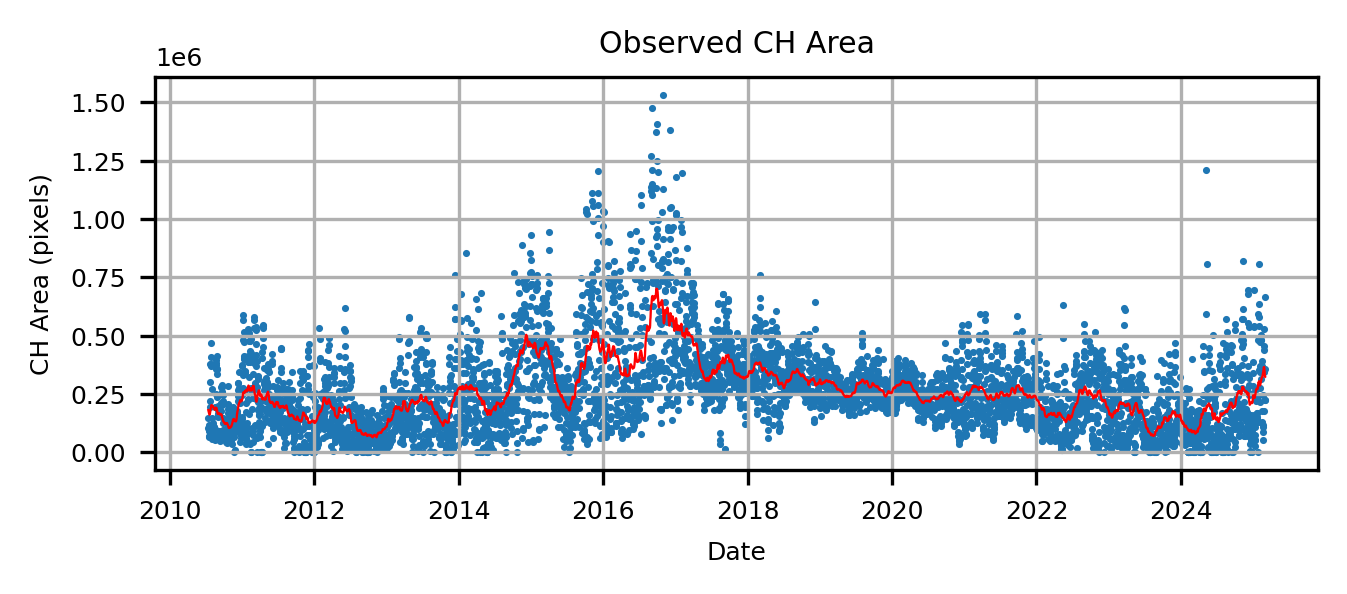

In [7]:
# Rolling Avg
pxAvg,pxStd = rollingAvg(dates,pxAreas,window)

# Plot Results
plt.figure(figsize=[5,1.7],dpi=300)
plt.rcParams.update({'font.size': 6})
plt.scatter(dates,pxAreas,.5,label='Observed Area')
plt.plot(dates,pxAvg,'r',lw=.55,label=label)
#plt.fill_between(dates,pxAvg-pxStd,pxAvg+pxStd,color=(1,0,0,.3),label='Standard Deviation')
#plt.legend()
plt.title('Observed CH Area')
plt.xlabel('Date')
plt.ylabel('CH Area (pixels)')
plt.grid()
title = 'CHareaPix' + label.replace(' ','') + '.eps'
plt.savefig(saveFolder+title)
plt.show()